# OCR with Python - pre-processing techiniques

# Importing the libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Grayscale

cvtColor() method is used to convert an image from one color space to another. There are more than 150 color-space conversion methods

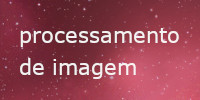

In [ ]:
img = cv2.imread('/content/img-process.jpg')
cv2_imshow(img)

In [ ]:
# 3 canais
img.shape

(100, 200, 3)

Uma das vantagens de converter para escala de xina é a redução de canais de 3 para 1, já que todos os três canais RGB ficam o mesmo valor. Isso torna o processamento mais rápido, o que pode ser útil no processamento por machine learning.

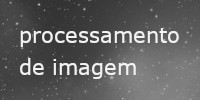

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
# 1 canal
gray.shape

(100, 200)

# Thresholding

Thresholding também é chamado de binarization e é um processo de segmentação de imagens, isto é, um processo de separar a imagem em regiões de interesse e não interesse, de acordo com um cut-off.

## Simple thresholding

Pixels abaixo do threshold ficam pretos e acima ficam brancos.

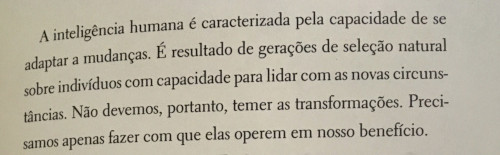

In [ ]:
img = cv2.imread('/content/page-book.jpg')
cv2_imshow(img)

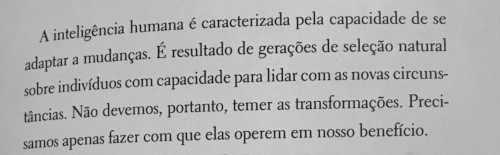

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values.The third argument is the maximum value which is assigned to pixel values exceeding the threshold. 
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html 

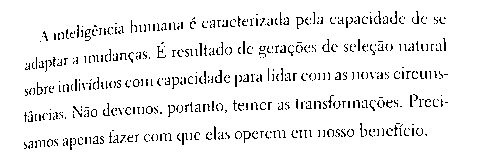

In [ ]:
# threshold(image, threshold, maxValue, thresholdType)
value, thresh = cv2.threshold(gray, 107, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
value

107.0

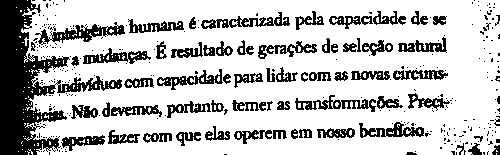

In [ ]:
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

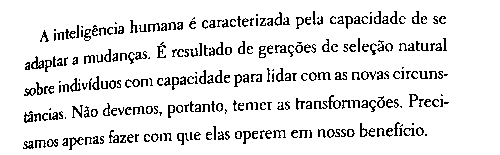

In [ ]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

## Otsu method

Também é um threshold global, porém ele é calculado automaticamente por meio de uma distribuição binomial (uma delas representa o ponto de interesse e a outra o background), selecionando o valor de threshold na região entre as duas distribuições.

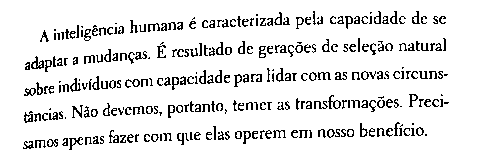

138.0


In [ ]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

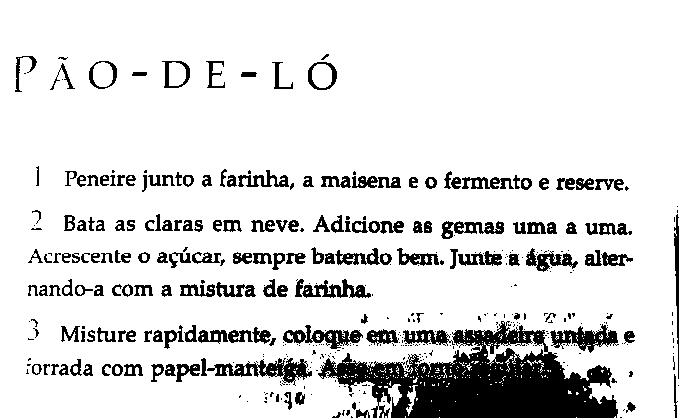

In [ ]:
img = cv2.imread('/content/recipe01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

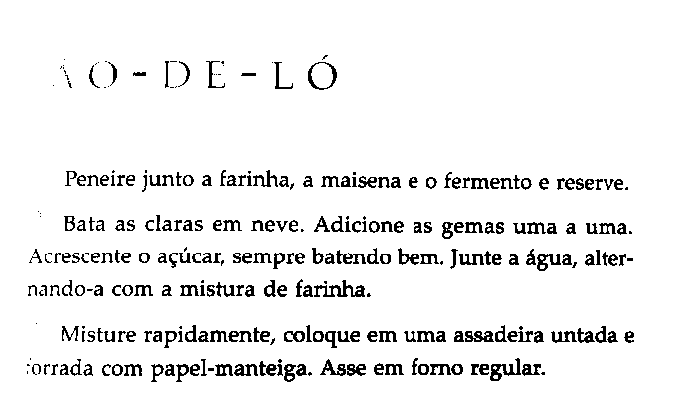

119.0


In [ ]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

## Adaptive Thresholding

A global value as a threshold  might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help (algorithm determines the threshold for a pixel based on a small region around it).

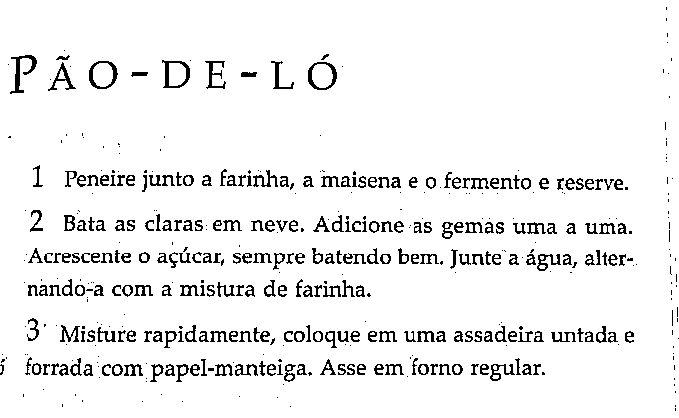

In [ ]:
# The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
# The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.
# cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,6)
cv2_imshow(thresh)

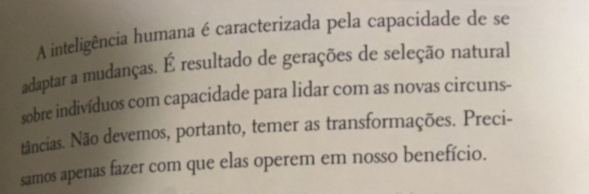

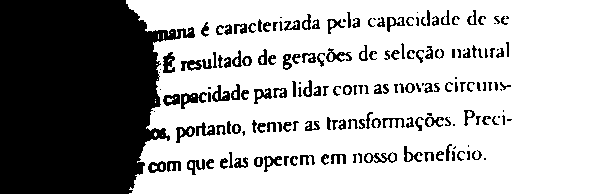

147.0


In [ ]:
img = cv2.imread('/content/book02.png')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

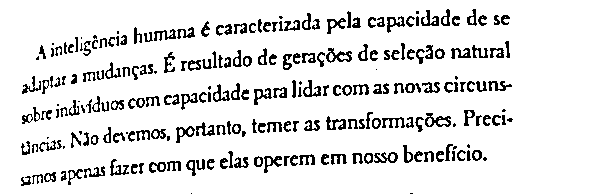

In [ ]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

## Gaussian Adaptive Thresholding

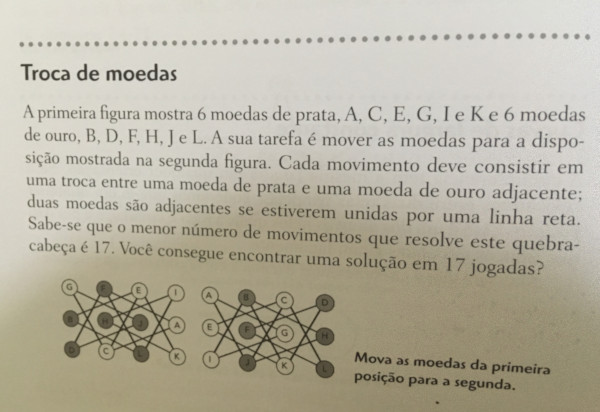

In [ ]:
img = cv2.imread('/content/book_adaptative.png')
cv2_imshow(img)

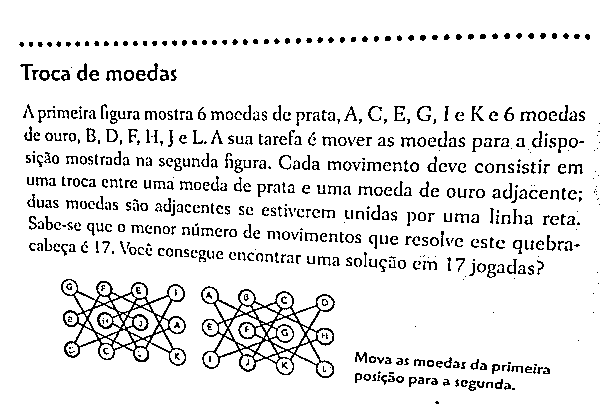

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_gaussian)

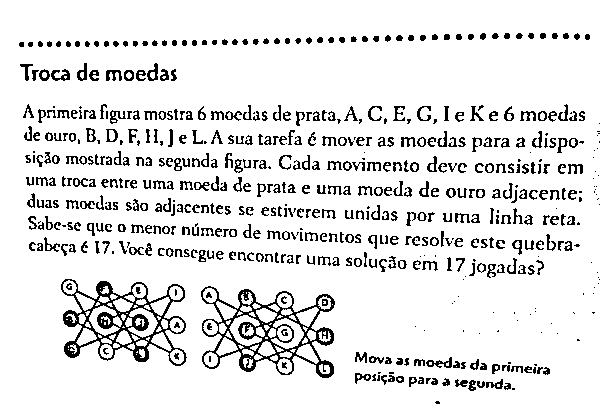

In [ ]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

# Color inversion

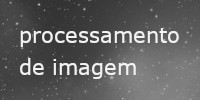

In [ ]:
img = cv2.imread('/content/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
img.shape, gray.shape

((100, 200, 3), (100, 200))

In [ ]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [ ]:
invert = 255 - gray

In [ ]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

In [ ]:
255 - 68

187

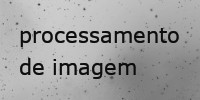

In [ ]:
cv2_imshow(invert)

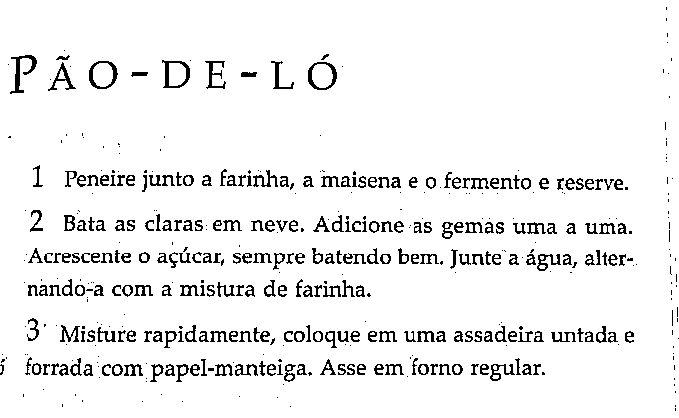

In [ ]:
cv2_imshow(thresh)

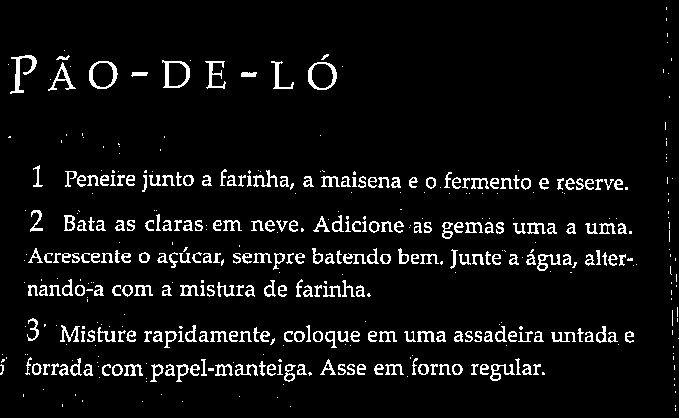

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

# Resizing

No processo de rezing, o tamanho da imagem é ajustado segundo um fator. Se o fator for > 1 a imagem é ampliada, caso seja < 1, a imagem é reduzida.

O preenchimento dos espaços entre os pixels é feito por interpolação (espaços vazios são preenchidos com base nos pixels vizinhos). Há vários tipos:

- INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
- INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
- INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results 
- INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
- INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.

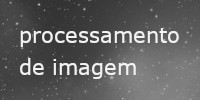

In [ ]:
cv2_imshow(gray)

In [ ]:
gray.shape

(100, 200)

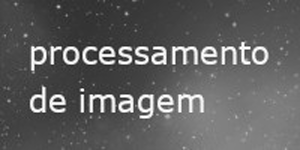

In [ ]:
increase = cv2.resize(gray, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(increase)

In [ ]:
increase.shape

(150, 300)

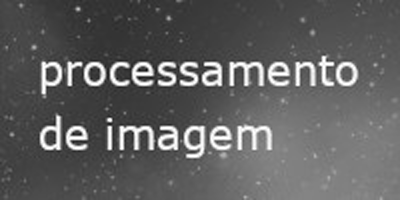

In [ ]:
increase = cv2.resize(gray, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
cv2_imshow(increase)

In [ ]:
increase.shape

(200, 400)

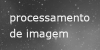

In [ ]:
decrease = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(decrease)

In [ ]:
decrease.shape

(50, 100)

# Morphological operations

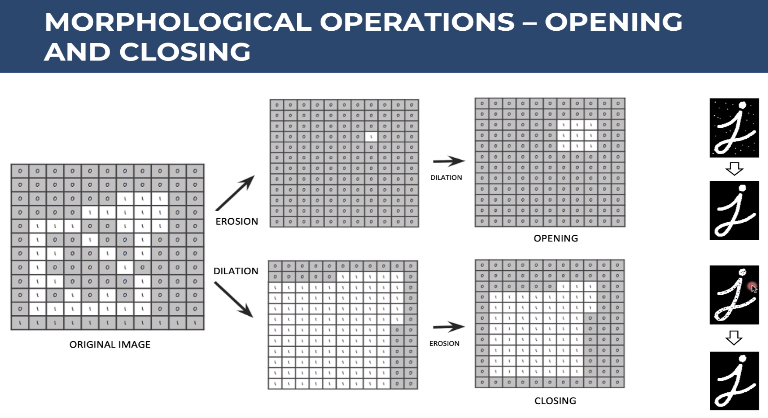

In [1]:
from IPython.display import Image # needed to embed an image
Image(filename='/content/Captura de tela de 2023-01-28 23-15-04.png', embed=True)

## Erosion

Imagine uma imagem com fundo preto (pixels 0) e o número escrito em branco (pixels 1). Na erosão, parte dos pixels brancos é substituida por pixels pretos, o que resulta em redução da imagem.

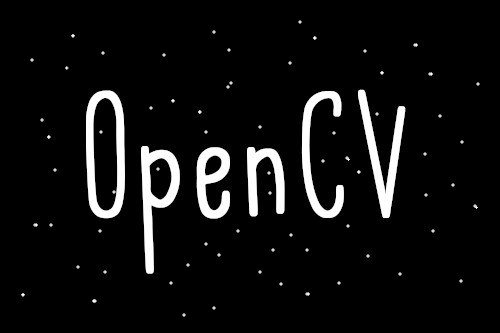

In [ ]:
img = cv2.imread('/content/text-opencv.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
np.ones((3,3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

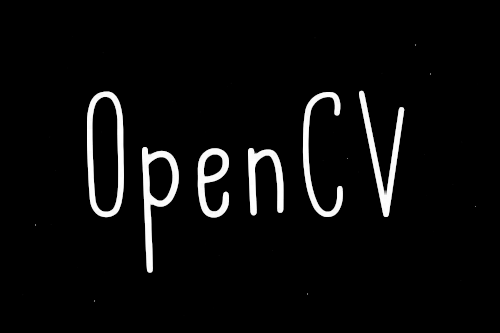

In [ ]:
erosion = cv2.erode(gray, np.ones((3,3), np.uint8))
cv2_imshow(erosion)

## Dilation

Imagine uma imagem com fundo preto (pixels 0) e o número escrito em branco (pixels 1). Na dilatação, parte dos pixels pretos é substituida por pixels brancos, o que resulta em ampliação da imagem.

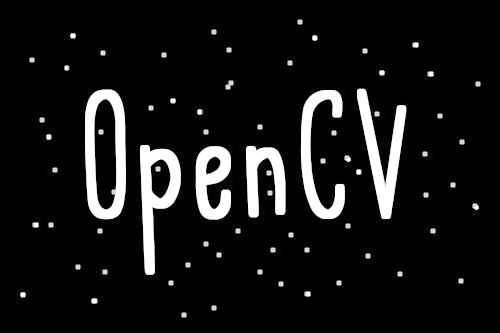

In [ ]:
dilation = cv2.dilate(gray, np.ones((3,3), np.uint8))
cv2_imshow(dilation)

## Opening

É a aplicação de erosão seguida por dilatação. É útil para remoção de ruído.

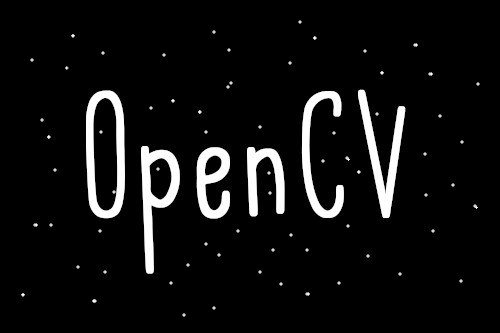

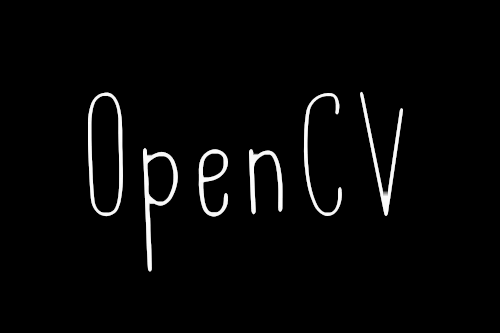

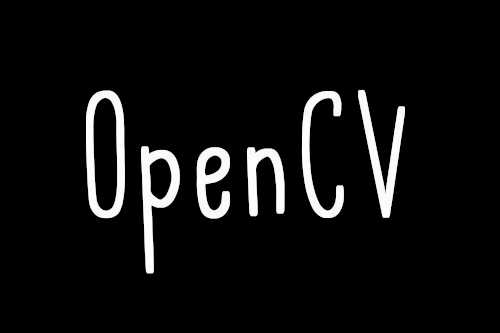

In [ ]:
erosion = cv2.erode(gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(erosion)
cv2_imshow(opening)

## Closing

É a aplicação de dilatação seguida por erosão. É útil para remoção de ruído.

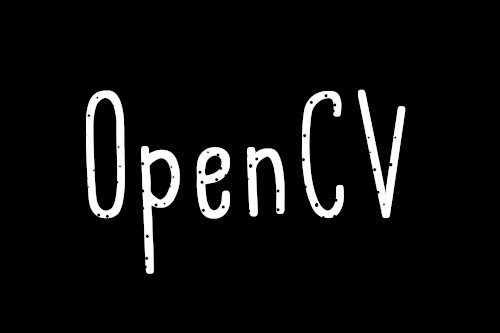

In [ ]:
img = cv2.imread('/content/text-opencv2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

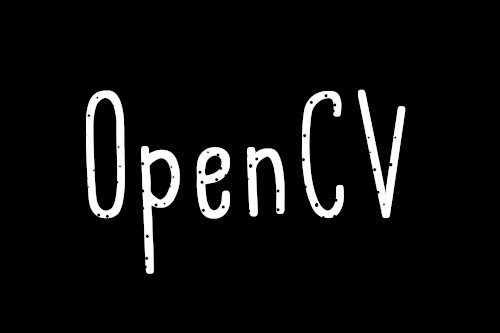

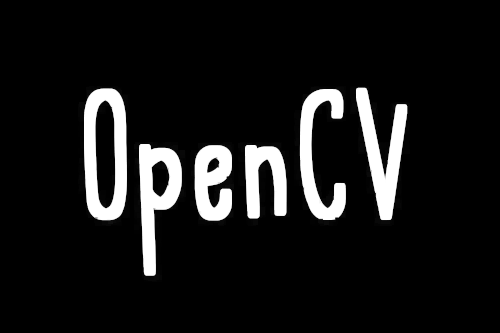

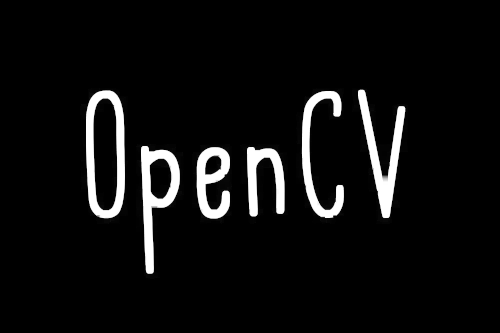

In [ ]:
dilation = cv2.dilate(gray, np.ones((5,5), np.uint8))
closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(dilation)
cv2_imshow(closing)

# Noise removal

Blur é uma das principais formas de remover ruído de imagens.
Essa técnica utiliza o conceito de kernel (https://en.wikipedia.org/wiki/Kernel_(image_processing)), que consiste em uma matriz usada durante os cálculos para aplicar as transformações na matrix que representa a imagem, recalculando o valores dos pixels.

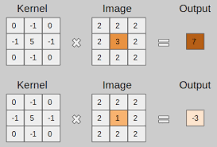

In [2]:
from IPython.display import Image 
Image(filename='/content/kernel.png', embed=True)

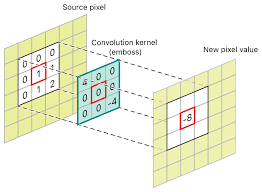

In [3]:
Image(filename='/content/kernel2.png', embed=True)

## Average blur

No exemplo, a seguir, a regiao em destaque na imagem é uma matriz 3x3 que é multiplicada pela por uma outra matrix chamada kernel, também 3x3. O resultado é uma terceira matriz, cuja soma dos elementos (1319) dividida pelo total de elementos (9) resulta em 147. Dessa forma, esse número representa essa região da imagem. Esse processo é repetido até que toda a imagem seja recalculada.

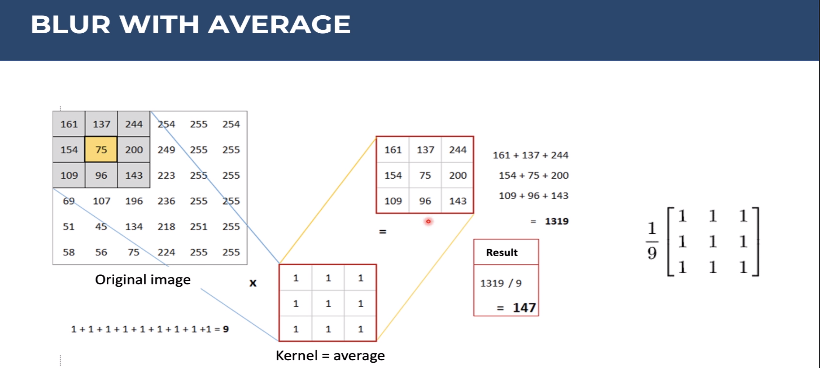

In [4]:
Image(filename='/content/Captura de tela de 2023-01-28 23-37-53.png', embed=True)

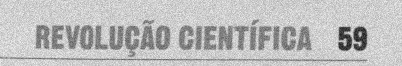

In [ ]:
img = cv2.imread('/content/test_noise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

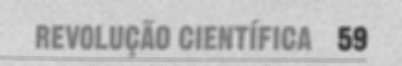

In [ ]:
average_blur = cv2.blur(gray, (5,5))
cv2_imshow(average_blur)

## Gaussian blur


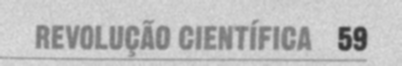

In [ ]:
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2_imshow(gaussian_blur)

## Median blur

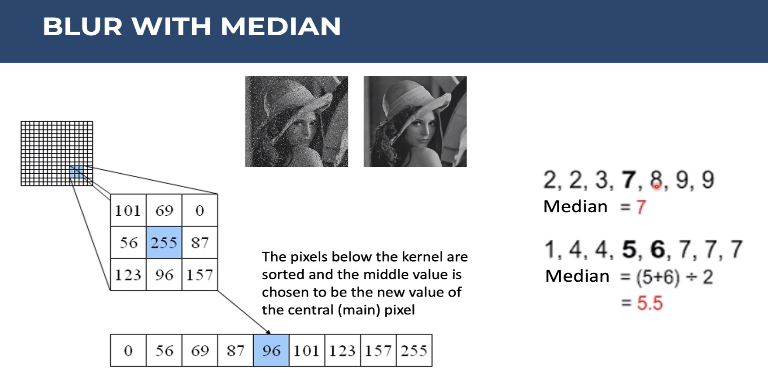

In [5]:
Image(filename='/content/Captura de tela de 2023-01-28 23-45-14.png', embed=True)

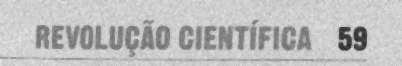

In [ ]:
median_blur = cv2.medianBlur(gray,3)
cv2_imshow(median_blur)

## Bilateral filter

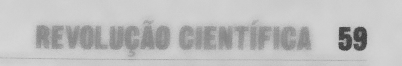

In [ ]:
bilateral_filter = cv2.bilateralFilter(gray, 15, 55, 45)
cv2_imshow(bilateral_filter)

# Text detection

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,513 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
import pytesseract

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2023-01-28 18:51:56--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-01-28 18:51:56--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-01-28 18:51:56--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awa

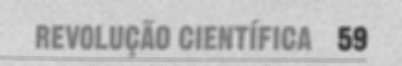

In [ ]:
cv2_imshow(average_blur)

In [ ]:
# devido a qualidade da imagem, nao conseguira extrair o texto
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(average_blur, lang = 'por', config=config_tesseract)
print(text)

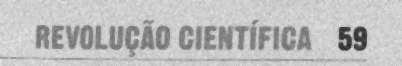

In [ ]:
cv2_imshow(median_blur)

In [ ]:
# imagem de melhor qualidade consegue extrair o texto
text = pytesseract.image_to_string(median_blur, lang = 'por', config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59



# Homework

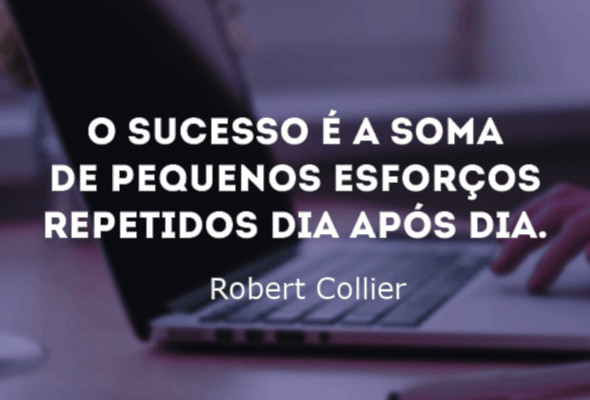

In [ ]:
img = cv2.imread('/content/sentence.jpg')
cv2_imshow(img)

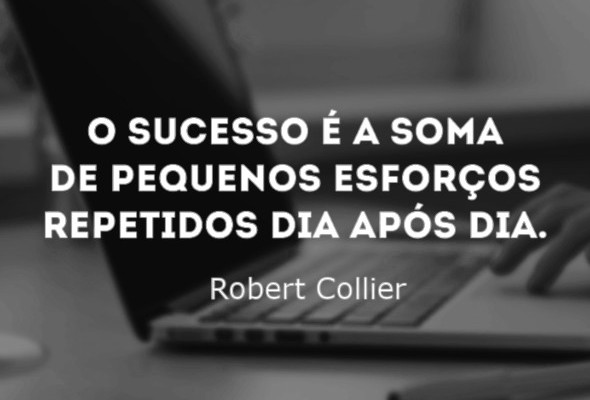

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

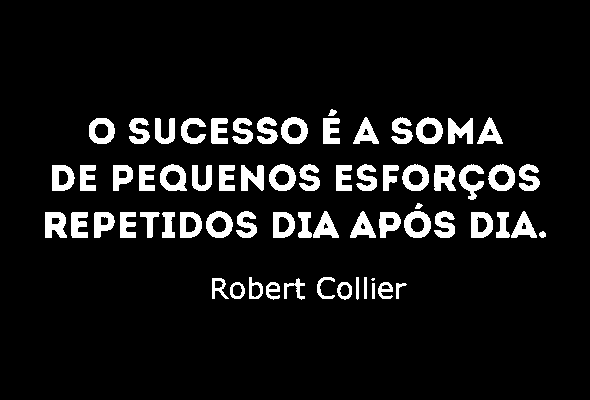

145.0


In [ ]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(thresh)
print(value)

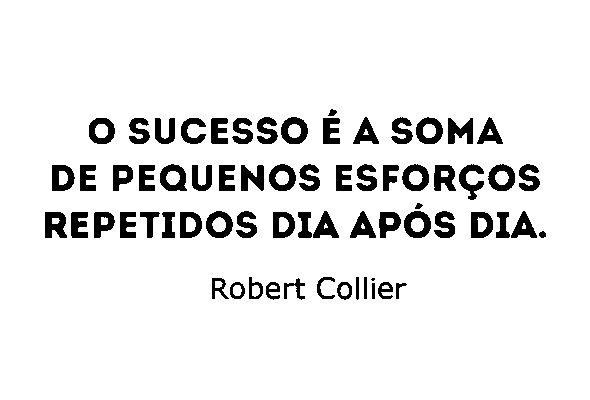

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

In [ ]:
print(pytesseract.image_to_string(thresh, lang = 'por', config=config_tesseract))

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

